#  Read the Data

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Understanding the data

In [4]:
#Check for Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#There are no null values hence the data looks good atleast on outer level now we have to check the distribution and need to do some EDA

In [7]:
# Will find if there are any duplicate values or not
print("Before dropping duplicates the shape of the data set is :",df.shape)
print("After dropping duplicates the shape of the data set is :",df.drop_duplicates().shape)

Before dropping duplicates the shape of the data set is : (730, 16)
After dropping duplicates the shape of the data set is : (730, 16)


In [8]:
# renaming few columns for readibility
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [9]:
#There are not duplicate values
# There are many unique values in some columns hence these wont be an important distinguisher for the model 
for column_name in df.columns:
    print(f"Total number of unique values for column {column_name} is: {df[column_name].nunique()}")


Total number of unique values for column instant is: 730
Total number of unique values for column dteday is: 730
Total number of unique values for column season is: 4
Total number of unique values for column year is: 2
Total number of unique values for column month is: 12
Total number of unique values for column holiday is: 2
Total number of unique values for column weekday is: 7
Total number of unique values for column workingday is: 2
Total number of unique values for column weathersit is: 3
Total number of unique values for column temp is: 498
Total number of unique values for column atemp is: 689
Total number of unique values for column humidity is: 594
Total number of unique values for column windspeed is: 649
Total number of unique values for column casual is: 605
Total number of unique values for column registered is: 678
Total number of unique values for column cnt is: 695


In [10]:
#Some of the columns such as Temp,atemp,humidty,windspeed,cnt are continuos variables and are important for model.
#But some of the columns such as instant,dteday,casual,registered are integers and might not be distinguisher
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
# Some of the columns needed to be mapped for preparing Model ready dataset

# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

# Encoding/mapping the workingday column

df.workingday = df.workingday.map({1:'Working_day',0:'Not_working_day'})

# Encoding/mapping the weathersit column

df.holiday = df.holiday.map({1:'Holiday',0:'Not_Holiday'})

# Encoding/mapping the weathersit column

df.year = df.year.map({0:2018,1:2019})


In [12]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,jan,Not_Holiday,sat,Not_working_day,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,Not_Holiday,sun,Not_working_day,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,Not_Holiday,mon,Working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,Not_Holiday,tue,Working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,Not_Holiday,wed,Working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Visulazing the data for better understanding data

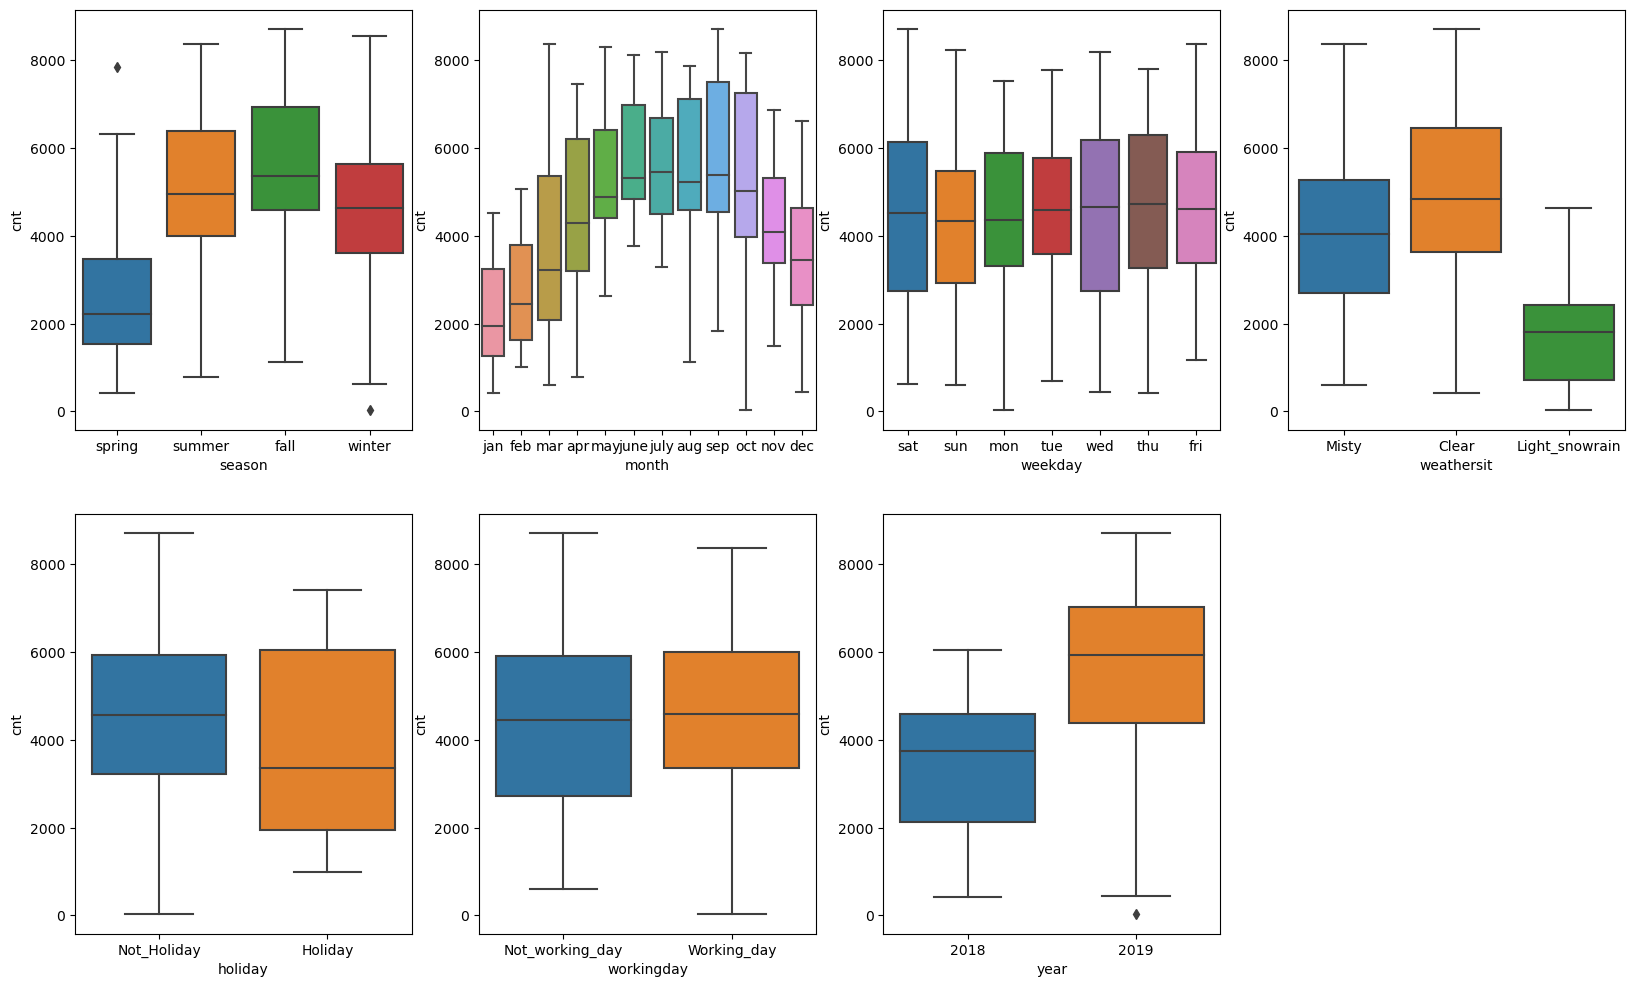

In [13]:
# Relation between the predictor variable with the target variable to decide if Linear regression makes sense

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()


In [14]:
#Most of the above suggest that there is some pattern in most of the columns but we can see that the relation is bit less in Weak day and Working day columns but we will decide this once we do statistical analysis 

In [15]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,jan,Not_Holiday,sat,Not_working_day,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,Not_Holiday,sun,Not_working_day,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,Not_Holiday,mon,Working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,Not_Holiday,tue,Working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,Not_Holiday,wed,Working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
df.dtypes

season         object
year            int64
month          object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
cnt             int64
dtype: object

In [17]:
#We will divide categorical columns and Numerical values and Target variable for easy creation of graphs
Categorical = []
Numerical =[]
Target =[]
for i in df.columns:
    if i=='cnt':
        Target.append(i)
    elif df[i].dtype=='int64' or df[i].dtype=='float64':
        Numerical.append(i)
    else:
        Categorical.append(i)

In [18]:
#Checking if the data has been divided correctly or not
print(Categorical),print(Numerical), print(Target)

['season', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
['year', 'temp', 'atemp', 'humidity', 'windspeed']
['cnt']


(None, None, None)

In [19]:
# function for creating barplot for columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df)
    

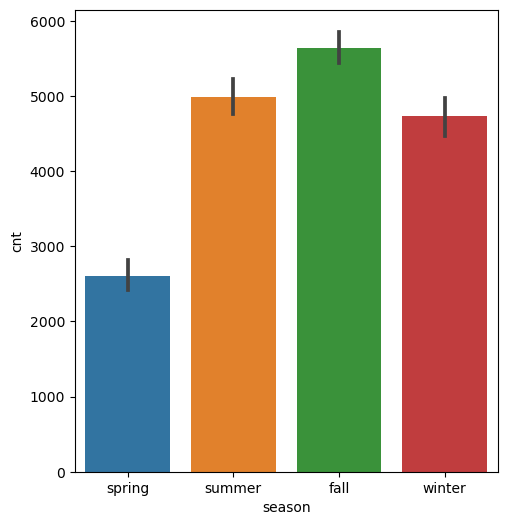

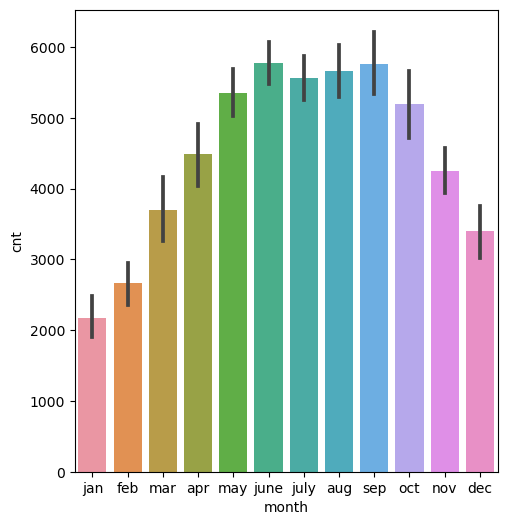

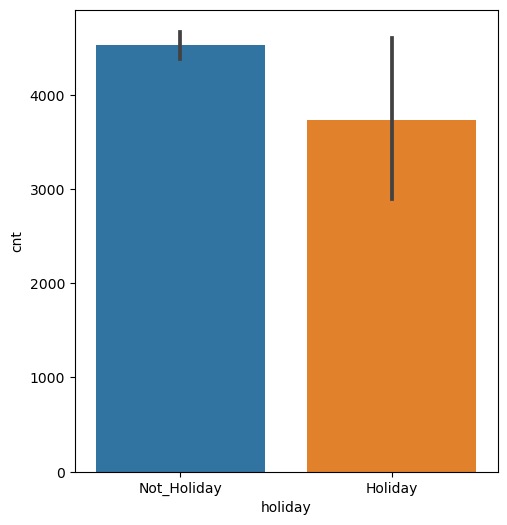

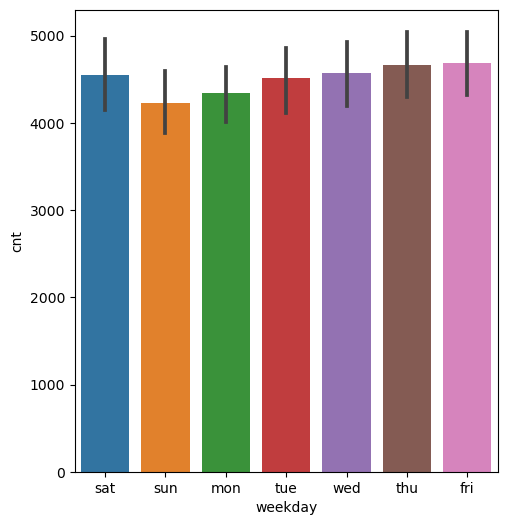

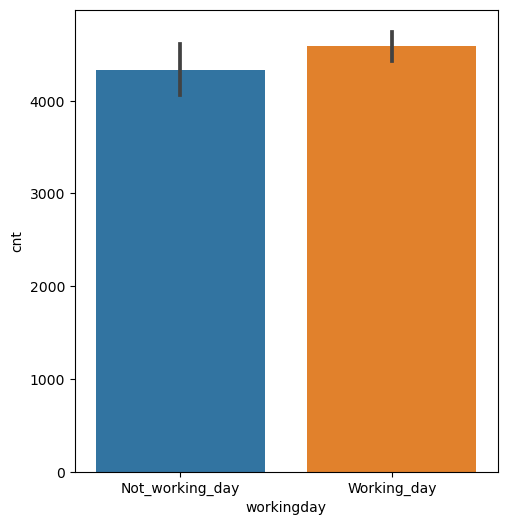

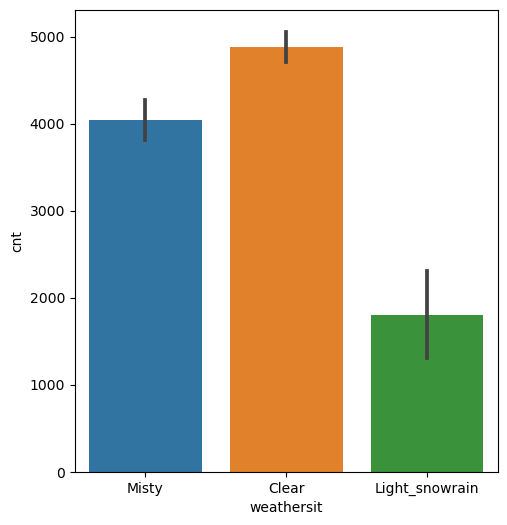

In [20]:
for i in Categorical:
    plot_cat_columns(i)

In [21]:
# We can see most sales happens in Misty/Clear and in Fall i.e. for the months June-Oct mostly. There is subtle difference in sales when the days is not a Holiday and hence working day

In [22]:
#We can do Bar plot for some of the Numerical values but we cant for all since there were lot of continuos variables such as Temp etc

In [23]:
df.groupby('year')['cnt'].sum()

year
2018    1243103
2019    2047742
Name: cnt, dtype: int64

In [24]:
2047742/1243103

1.6472826467316064

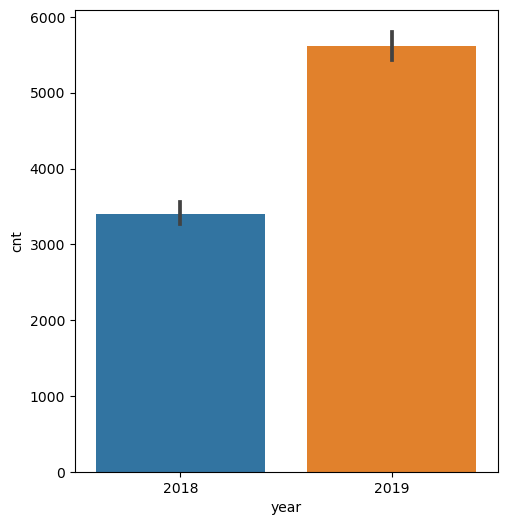

In [25]:
plot_cat_columns('year')

In [26]:
#Sales increased in 2019

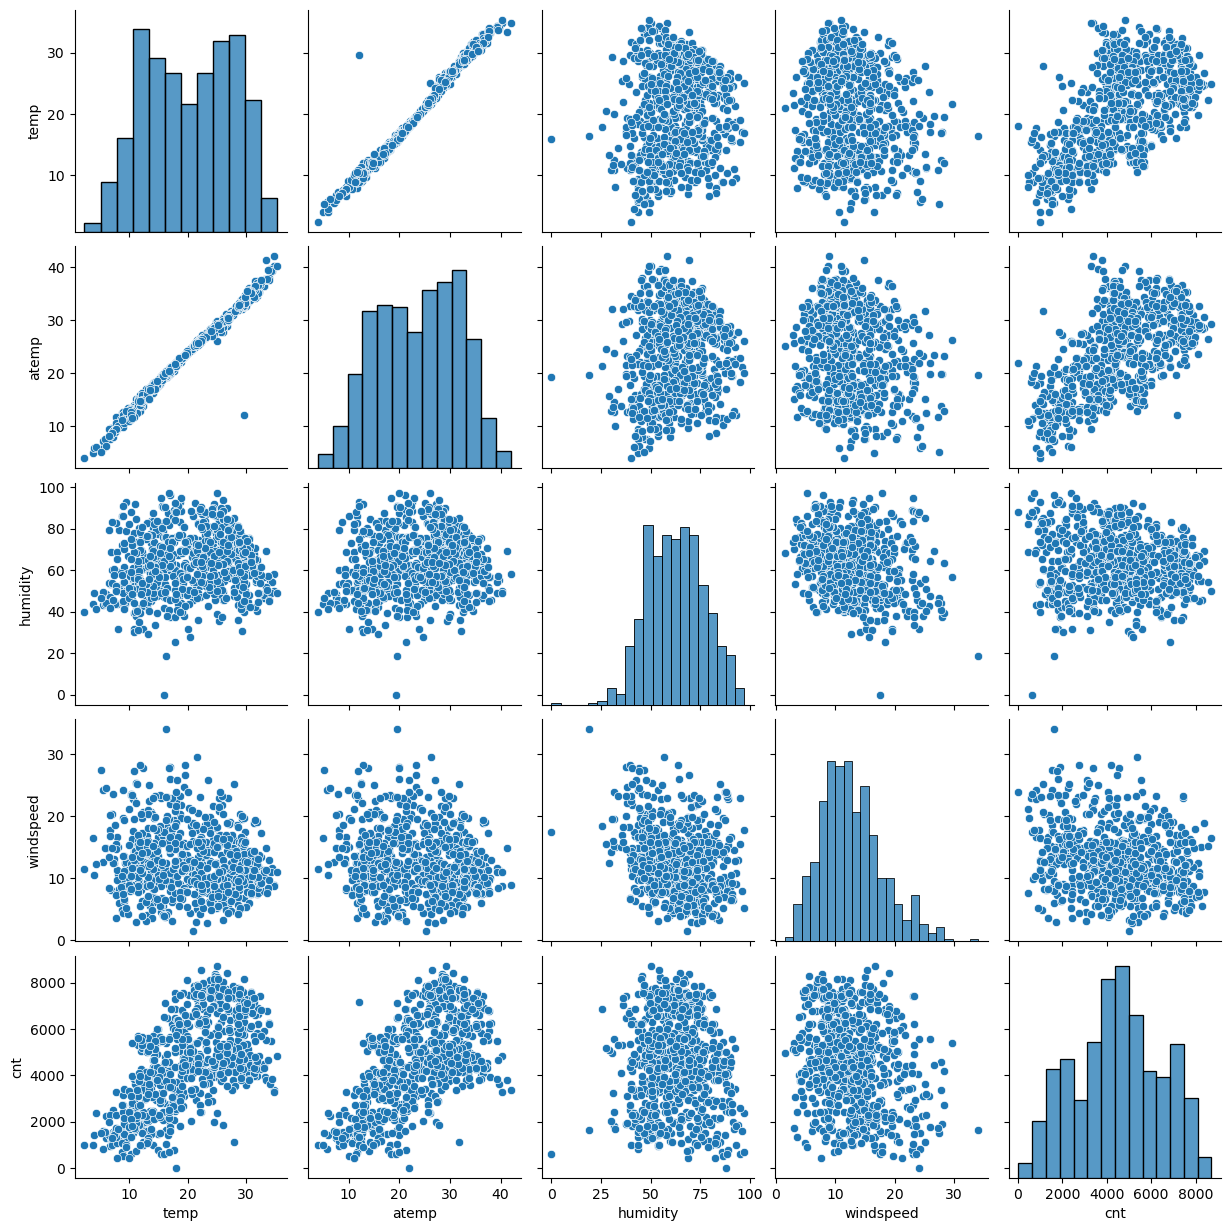

In [27]:
# We will see the corelation using Pair Plot

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

In [28]:
#atemp and temp are very highly corelated i.e. 0.991 we can see the same in pairplot as well we can drop one but we will do the statistical analysis to confirm

# Data Preparation

In [29]:
# Dummy variable creation for categorical values

for i in Categorical:
    dummy=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df=df.drop(i,axis=1)

In [30]:
df.head()

,year,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,...,Not_Holiday,mon,sat,sun,thu,tue,wed,Working_day,Light_snowrain,Misty
0,2018,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
1,2018,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,...,True,False,False,True,False,False,False,False,False,True
2,2018,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,...,True,True,False,False,False,False,False,True,False,False
3,2018,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
4,2018,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,...,True,False,False,False,False,False,True,True,False,False


In [31]:
df.replace({False: 0, True: 1}, inplace=True)

In [32]:
#Will check if there are any null values
df.isnull().sum()

year              0
temp              0
atemp             0
humidity          0
windspeed         0
cnt               0
spring            0
summer            0
winter            0
aug               0
dec               0
feb               0
jan               0
july              0
june              0
mar               0
may               0
nov               0
oct               0
sep               0
Not_Holiday       0
mon               0
sat               0
sun               0
thu               0
tue               0
wed               0
Working_day       0
Light_snowrain    0
Misty             0
dtype: int64

In [33]:
#There are no null vlaues

# Modelling

In [34]:
# splitting the dataframe into Train set  and Test set

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 1337)

In [35]:
# Checking the shapes
df.shape,df_train.shape,df_test.shape

((730, 30), (510, 30), (220, 30))

In [36]:
# Using MinMaxScaler to Rescaling the features for Modelling purpose

scaler = MinMaxScaler()

In [37]:
# we will apply Scaler to the Numerical columns since we dont need to apply for the categorical values
Cols =Numerical+Target

In [38]:
df_train[Cols] = scaler.fit_transform(df_train[Cols])


In [39]:
# Building the First linear Model

y_train = df_train.pop('cnt')
X_train = df_train.copy(deep=True)

In [40]:
# Recursive feature elimination to find the best 15 features for the Model which can be further reduced based on the statistical measures
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe= rfe.fit(X_train, y_train)

In [41]:
# Let us see which columns are most important according to RFE
X_train.columns[rfe.support_]

Index(['year', 'temp', 'atemp', 'humidity', 'windspeed', 'spring', 'winter',
       'dec', 'july', 'nov', 'sep', 'sat', 'Working_day', 'Light_snowrain',
       'Misty'],
      dtype='object')

In [42]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [43]:
# Dataframe with top 15 selected variables by RFE

X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [44]:
# Now we will calculate VIF for the top RFE features to check for Multi collinearity

In [45]:
X_train_rfe.head()

,year,temp,atemp,humidity,windspeed,spring,winter,dec,july,nov,sep,sat,Working_day,Light_snowrain,Misty
505,1.0,0.682503,0.651139,0.834190,0.434601,0,0,0,0,0,0,0,1,0,1
181,0.0,0.839669,0.766883,0.407455,0.165370,0,0,0,1,0,0,0,1,0,0
147,0.0,0.755285,0.713647,0.750214,0.428185,0,0,0,0,0,0,1,0,0,0
544,1.0,0.981014,0.946798,0.502571,0.294854,0,0,0,0,0,0,0,1,0,0
41,0.0,0.164499,0.179900,0.520683,0.177620,1,0,0,0,0,0,0,1,0,0


In [46]:
#Model 1
calculateVIF(X_train_rfe)

,Features,VIF
2,atemp,1201.16
1,temp,1180.27
3,humidity,24.65
4,windspeed,5.10
12,Working_day,4.69
6,winter,2.86
5,spring,2.68
14,Misty,2.34
0,year,2.08
11,sat,1.77


In [47]:
#Now we will check statistical values and by combination of RFE and statitstical values we will select the features
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.64e-186
Time:                        22:45:49   Log-Likelihood:                 485.88
No. Observations:                 510   AIC:                            -939.8
Df Residuals:                     494   BIC:                            -872.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2904      0.035      8.

In [48]:
# This also proves our prior analysis that atemp and temp are highly corelated hence we will drop atemp and recaluclate the vif

In [49]:
X_train_rfe=X_train_rfe.drop(columns=['atemp'])

In [50]:
#Model 2
calculateVIF(X_train_rfe)

,Features,VIF
2,humidity,23.70
1,temp,17.81
3,windspeed,4.79
11,Working_day,4.68
5,winter,2.81
4,spring,2.67
13,Misty,2.32
0,year,2.08
10,sat,1.77
8,nov,1.74


In [51]:
#Now we have reduced our collenarity for temp as well 

In [52]:
#Now we will check statistical values and by combination of RFE and statitstical values we will select the features
X_train_lm_2 = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          8.27e-185
Time:                        22:45:49   Log-Likelihood:                 480.37
No. Observations:                 510   AIC:                            -930.7
Df Residuals:                     495   BIC:                            -867.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3037      0.035      8.

In [53]:
#P values doesnt give much of the details but humidity std error is also high hence we will drop the column and recalculate the vif to check if there is any improvement or not

In [54]:
X_train_rfe=X_train_rfe.drop(columns=['humidity'])

In [55]:
#Model 3
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,7.22
2,windspeed,4.78
10,Working_day,4.60
4,winter,2.42
0,year,2.07
3,spring,1.92
9,sat,1.75
7,nov,1.71
12,Misty,1.61
6,july,1.38


In [56]:
X_train_lm_3 = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          4.29e-180
Time:                        22:45:49   Log-Likelihood:                 466.41
No. Observations:                 510   AIC:                            -904.8
Df Residuals:                     496   BIC:                            -845.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1870      0.028      6.

In [57]:
# Now we have high P value in Winter and July we will drop July since we have other months data

In [58]:
X_train_rfe=X_train_rfe.drop(columns=['july'])

In [59]:
#Model 3
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,5.98
2,windspeed,4.72
9,Working_day,4.57
4,winter,2.40
0,year,2.05
3,spring,1.92
8,sat,1.75
6,nov,1.71
11,Misty,1.59
5,dec,1.37


In [60]:
X_train_lm_3 = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          4.08e-179
Time:                        22:45:49   Log-Likelihood:                 461.34
No. Observations:                 510   AIC:                            -896.7
Df Residuals:                     497   BIC:                            -841.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1989      0.028      7.

In [61]:
X_train_rfe=X_train_rfe.drop(columns=['sat'])

In [62]:
#Model 3
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,5.14
2,windspeed,4.61
8,Working_day,3.07
4,winter,2.36
0,year,2.05
3,spring,1.82
6,nov,1.70
10,Misty,1.58
5,dec,1.37
7,sep,1.18


In [63]:
X_train_lm_4 = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          8.03e-178
Time:                        22:45:49   Log-Likelihood:                 455.49
No. Observations:                 510   AIC:                            -887.0
Df Residuals:                     498   BIC:                            -836.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2207      0.028      7.

In [64]:
#now we have our final set of features that are important for our Linear Regression model

In [65]:
print('Final selected features for our Linear regression Model are:')
for column in X_train_rfe.columns:
    print(column)

Final selected features for our Linear regression Model are:
year
temp
windspeed
spring
winter
dec
nov
sep
Working_day
Light_snowrain
Misty


In [66]:
lr_4.params

const             0.220699
year              0.250022
temp              0.402449
windspeed        -0.118680
spring           -0.132852
winter            0.082375
dec              -0.061697
nov              -0.080643
sep               0.057427
Working_day       0.029632
Light_snowrain   -0.283091
Misty            -0.083288
dtype: float64

# Residual analysis of the Train data and how the errors has been distributed across

In [67]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

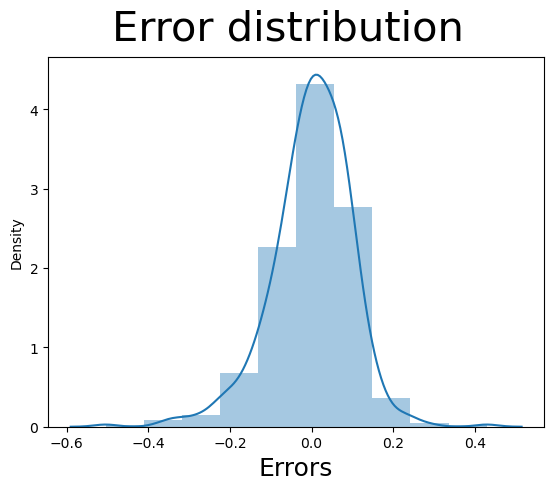

In [68]:
# Plot of erros

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 10)
fig.suptitle('Error distribution', fontsize = 30) 
plt.xlabel('Errors', fontsize = 18)

In [69]:
# we can see erros are normally distributions as this is one of the assumption while doing the Linear regression model

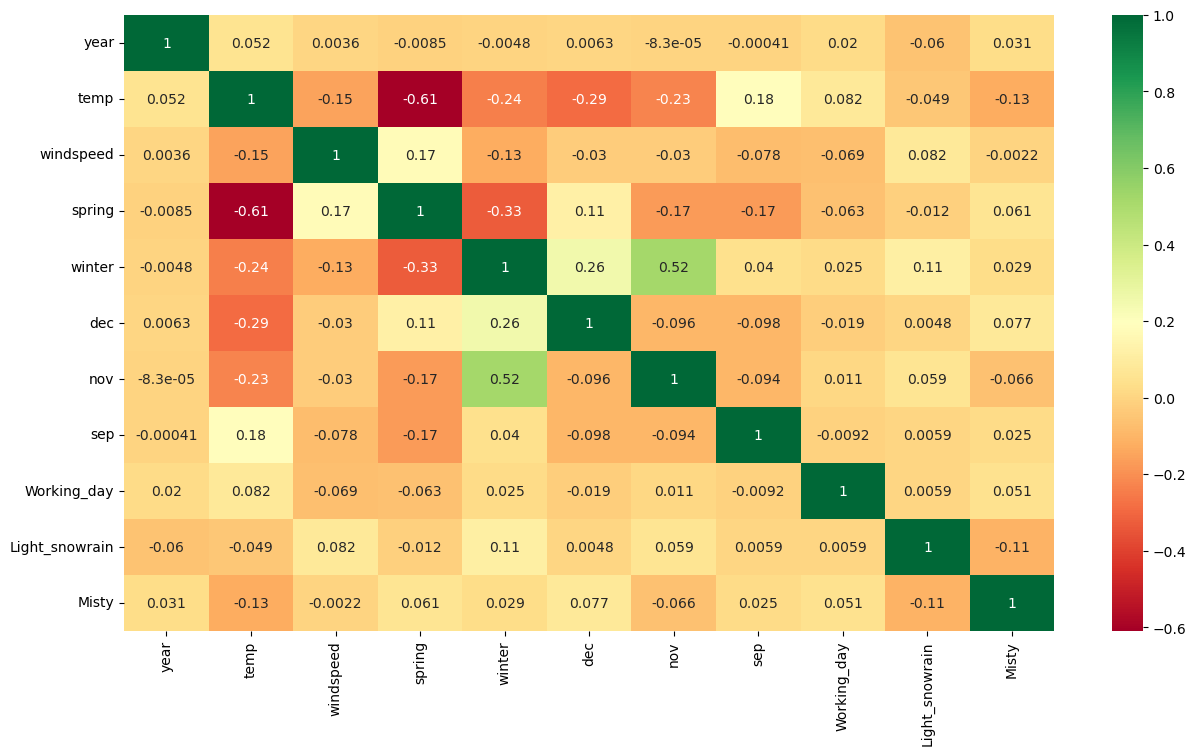

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [71]:
correlation_matrix = X_train_rfe.corr()
np.fill_diagonal(correlation_matrix.values, 0)
# Find rows where the correlation is greater than 0.7. I am considering 0.7 because i feel these are highly corelated
high_correlation_rows = correlation_matrix[correlation_matrix > 0.7]

# Display the rows with high correlation
print("Rows with correlation greater than 0.7:")
print(high_correlation_rows)

Rows with correlation greater than 0.7:
                year  temp  windspeed  spring  winter  dec  nov  sep  \
year             NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   
temp             NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   
windspeed        NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   
spring           NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   
winter           NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   
dec              NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   
nov              NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   
sep              NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   
Working_day      NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   
Light_snowrain   NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   
Misty            NaN   NaN        NaN     NaN     NaN  NaN  NaN  NaN   

                Working_day  Light_snowrain  Misty  
year                    NaN             Na

In [72]:
#There are no corelated features here

In [73]:
# Will check the Homoscedasticity since this is one of the assmuption in the Linear regression model

In [74]:
# Before that we will

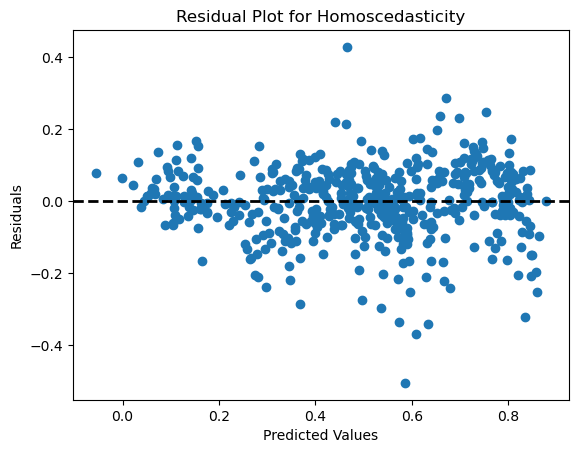

In [75]:
import matplotlib.pyplot as plt

# Assuming model is your linear regression model and X_train, y_train are your data
y_train_pred = lr_4.predict(X_train_lm_4)
residuals = y_train - y_train_pred

plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()


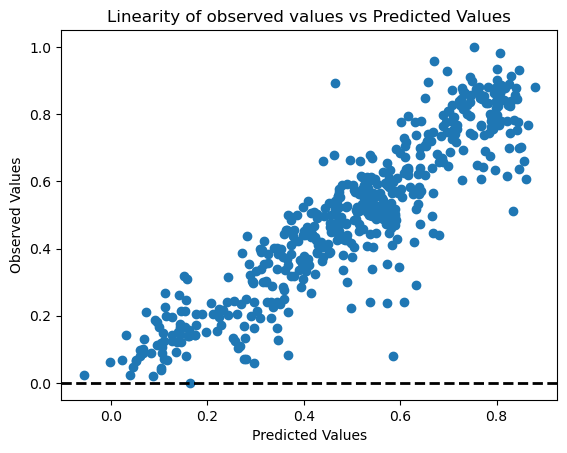

In [76]:
import matplotlib.pyplot as plt

# Assuming model is your linear regression model and X_train, y_train are your data
y_train_pred = lr_4.predict(X_train_lm_4)


plt.scatter(y_train_pred, y_train)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Linearity of observed values vs Predicted Values')
plt.show()


In [77]:
# Hence our assumptions holds and our Model is ready for final validation

# Predictions using Final Model

In [78]:
df_test

,year,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,...,Not_Holiday,mon,sat,sun,thu,tue,wed,Working_day,Light_snowrain,Misty
580,2019,32.526653,37.56335,61.3333,17.249686,6824,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
672,2019,13.359153,16.47690,53.2917,12.000236,5107,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
191,2018,31.262500,36.49020,63.5833,18.916579,4086,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
345,2018,9.771653,13.50980,67.0833,4.251150,3310,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
431,2019,21.627500,26.23020,56.7500,29.584721,5382,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2018,8.663464,11.42935,58.5217,8.565213,1708,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
249,2018,24.565847,27.21145,91.7083,6.500394,1996,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0
166,2018,25.761653,29.76730,68.8333,13.833557,3767,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
397,2019,16.365847,19.94855,67.2917,12.541529,3761,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1


In [79]:
# scaling the test dataset

df_test[Cols] = scaler.transform(df_test[Cols])
df_test.head()

,year,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,...,Not_Holiday,mon,sat,sun,thu,tue,wed,Working_day,Light_snowrain,Misty
580,1.0,0.929327,0.899500,0.630677,0.484602,0.771822,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
672,1.0,0.337583,0.335164,0.547987,0.323079,0.564530,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
191,0.0,0.890300,0.870779,0.653813,0.535891,0.441265,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
345,0.0,0.226828,0.255755,0.689803,0.084644,0.347579,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
431,1.0,0.592845,0.596191,0.583548,0.864144,0.597730,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [80]:
df_test.describe()

,year,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,...,Not_Holiday,mon,sat,sun,thu,tue,wed,Working_day,Light_snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.472727,0.540840,0.516155,0.637742,0.379075,0.473514,0.268182,0.254545,0.218182,0.050000,...,0.968182,0.168182,0.140909,0.136364,0.177273,0.113636,0.150000,0.690909,0.050000,0.281818
std,0.500394,0.237298,0.225231,0.152148,0.159851,0.232343,0.444023,0.436599,0.413953,0.218442,...,0.175916,0.374881,0.348721,0.343957,0.382770,0.318093,0.357886,0.463173,0.218442,0.450911
min,0.000000,0.107865,0.063168,0.313625,0.057698,-0.049378,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.343912,0.329674,0.516816,0.270203,0.298473,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.514790,0.506231,0.620394,0.348725,0.469516,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.748956,0.696558,0.750321,0.468590,0.649342,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.015822,1.019437,0.997858,0.864144,0.961487,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
# we will keep only the selected columns that we have finalized using RFE and statistical analysis
X_test = X_test[X_train_rfe.columns]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [83]:
y_pred = lr_4.predict(X_test_lm_4)

In [84]:
round(lr_4.params,4)

const             0.2207
year              0.2500
temp              0.4024
windspeed        -0.1187
spring           -0.1329
winter            0.0824
dec              -0.0617
nov              -0.0806
sep               0.0574
Working_day       0.0296
Light_snowrain   -0.2831
Misty            -0.0833
dtype: float64

In [85]:
# R2 Score on Test data
r2_test = r2_score(y_test, y_pred)
round(r2_test,4)

0.8358

In [86]:
# R2 Score on Train data
r2_train = r2_score(y_train , y_train_pred)
round(r2_train,4)

0.8206

In [87]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2_test = round(1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2_test)

0.8272


In [88]:
# Calculating Adjusted-R^2 value for the Train dataset

adjusted_r2_train = round(1-(1-r2_train)*(X_train_rfe.shape[0]-1)/(X_train_rfe.shape[0]-X_train_rfe.shape[1]-1),4)
print(adjusted_r2_train)

0.8166


# Metrices of Testing dataset:
- Test dataset R^2           : 0.83
- Train dataset R^2          : 0.82 
- Test dataset Adjusted R^2  : 0.82
- Train dataset Adjusted R^2 : 0.81
Demand of bikes depend on year, temp, windspeed,spring, winter, dec, july,nov, sep,Light_snowrain, Misty, working_day and 